<a href="https://colab.research.google.com/github/venkatesh762004/venkatesh/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

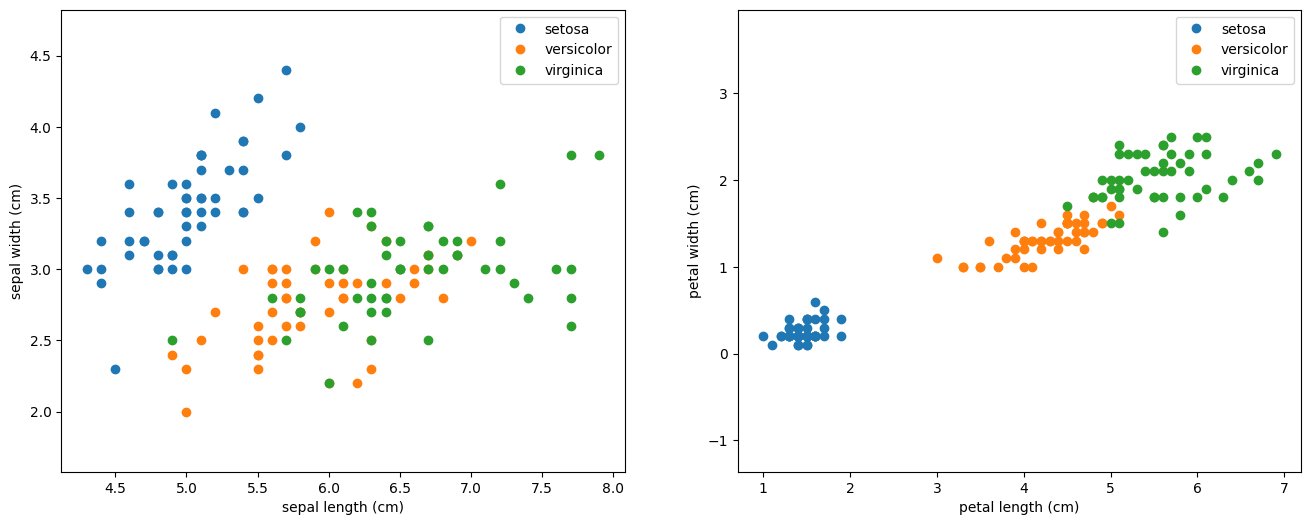

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:01<00:00, 86.63it/s]


# Plot training progress

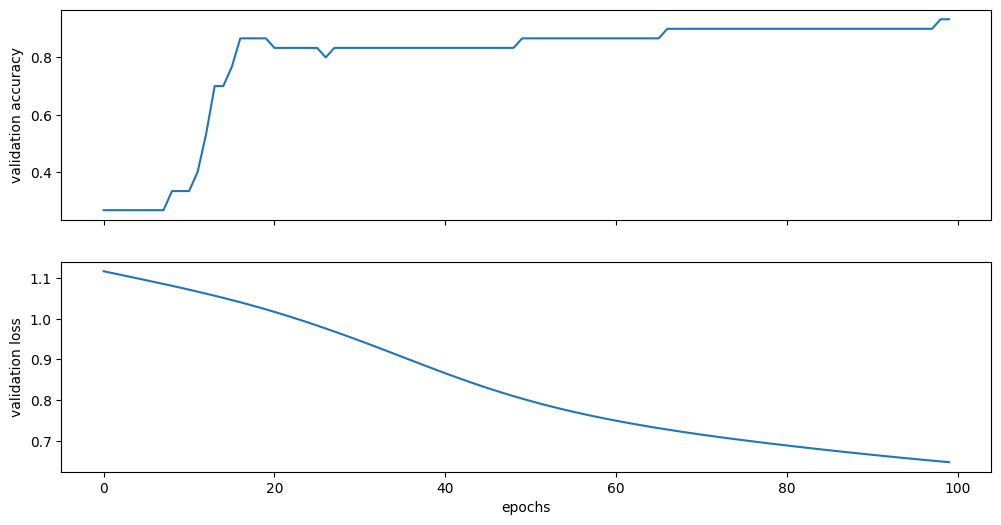

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

Solutions 1.Try changing the number of hidden layers.

Adding 4 more hidden layers

100%|██████████| 100/100 [00:00<00:00, 216.71it/s]


Text(0.5, 0, 'epochs')

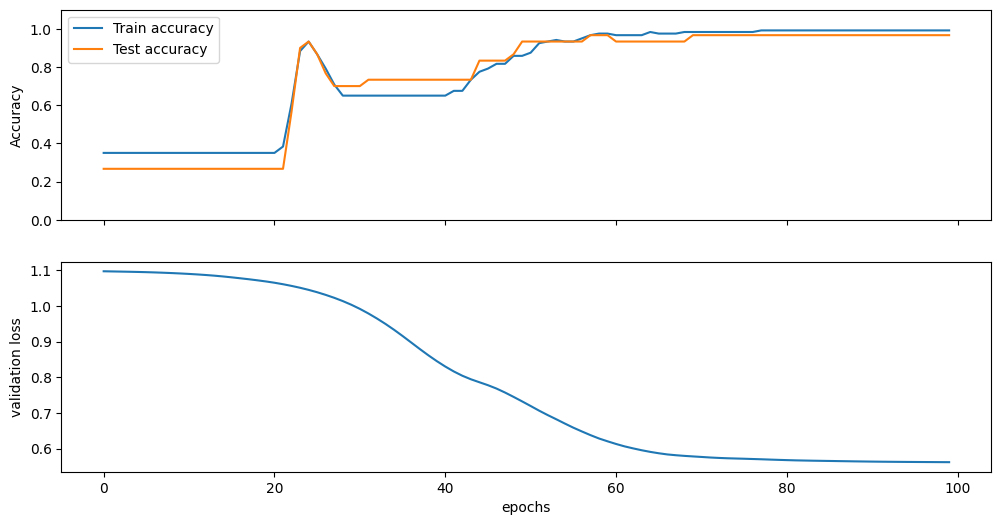

In [9]:
# Preparing Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

# Defining the model architecture
class Model_exp1(nn.Module):
    def __init__(self, input_dim):
        super(Model_exp1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2_h1 = nn.Linear(50, 50)
        self.layer2_h2 = nn.Linear(50, 50)
        self.layer2_h3 = nn.Linear(50, 50)
        self.layer2_h4 = nn.Linear(50, 50)
        self.layer2_h5 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2_h1(x))
        x = F.relu(self.layer2_h2(x))
        x = F.relu(self.layer2_h3(x))
        x = F.relu(self.layer2_h4(x))
        x = F.relu(self.layer2_h5(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model_exp1(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list = np.zeros((EPOCHS,))
accuracy_list_train = np.zeros((EPOCHS,))
accuracy_list_test = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        # Test Accuracy
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list_test[epoch] = correct.mean()

        # Train Accuracy
        y_pred = model(X_train)
        correct = (torch.argmax(y_pred, dim=1) == y_train).type(torch.FloatTensor)
        accuracy_list_train[epoch] = correct.mean()

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list_train, label="Train accuracy")
ax1.plot(accuracy_list_test, label="Test accuracy")
ax1.legend()
ax1.set_ylabel("Accuracy")
ax1.set_ylim(0, 1.1)
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")


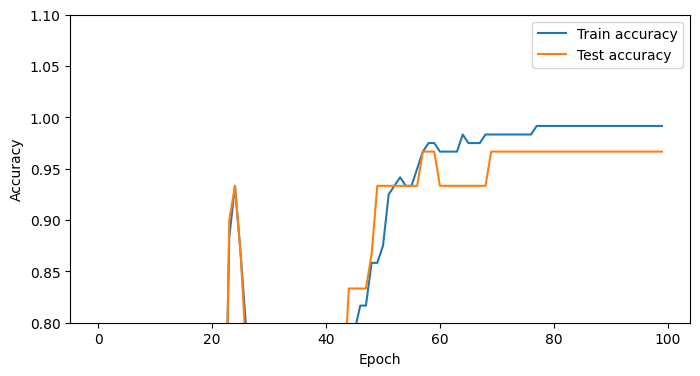

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(accuracy_list_train, label="Train accuracy")
plt.plot(accuracy_list_test, label="Test accuracy")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.ylim(0.8, 1.1)
plt.show()

After adding 4 more layers, the model parameters converged and last plot shows that model is bit over fitting

Removing hidden layers

100%|██████████| 100/100 [00:00<00:00, 597.67it/s]


Text(0.5, 0, 'epochs')

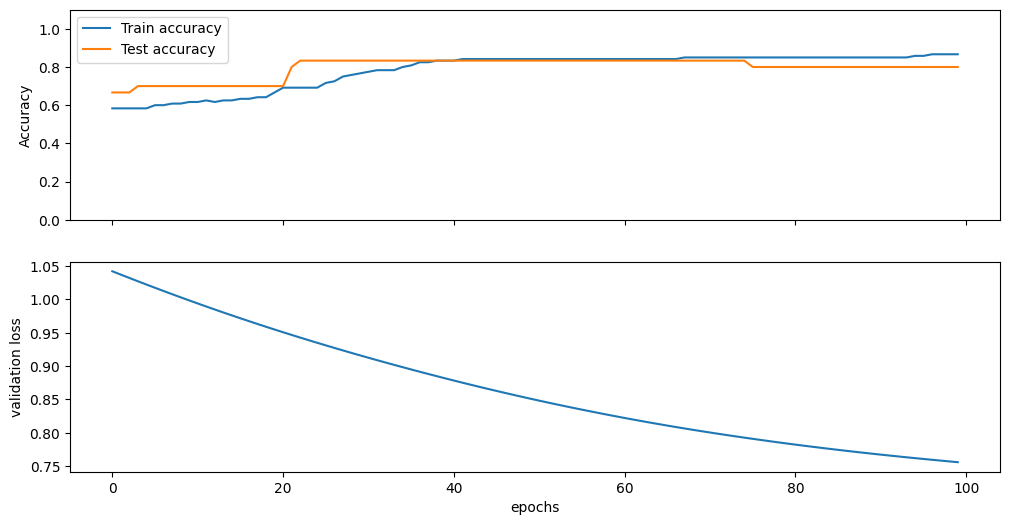

In [11]:
# Preparing Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

# Defining the model architecture
class Model_exp1(nn.Module):
    def __init__(self, input_dim):
        super(Model_exp1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model_exp1(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list = np.zeros((EPOCHS,))
accuracy_list_train = np.zeros((EPOCHS,))
accuracy_list_test = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        # Test Accuracy
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list_test[epoch] = correct.mean()

        # Train Accuracy
        y_pred = model(X_train)
        correct = (torch.argmax(y_pred, dim=1) == y_train).type(torch.FloatTensor)
        accuracy_list_train[epoch] = correct.mean()

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list_train, label="Train accuracy")
ax1.plot(accuracy_list_test, label="Test accuracy")
ax1.legend()
ax1.set_ylabel("Accuracy")
ax1.set_ylim(0, 1.1)
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")


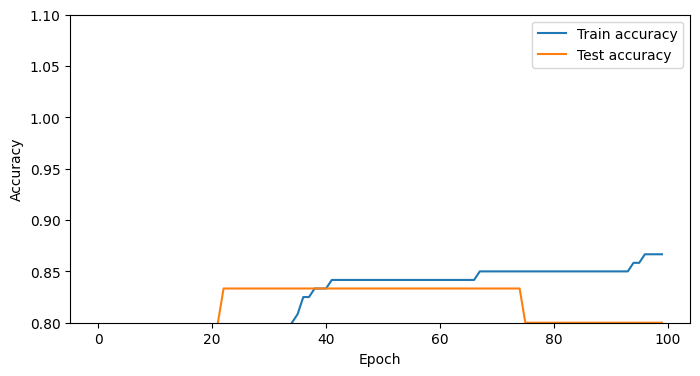

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(accuracy_list_train, label="Train accuracy")
plt.plot(accuracy_list_test, label="Test accuracy")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.ylim(0.8, 1.1)
plt.show()

Model didn't performe well as compared to model with one hidden layer. Hidden layers in between 2 and 4 seems to be an good option given that number of neurons in one hidden layer remains same.

2.Try changing the number of neurons in the hidden layer.

================== Number of neuron in HL = 50 ==================


100%|██████████| 100/100 [00:00<00:00, 385.94it/s]


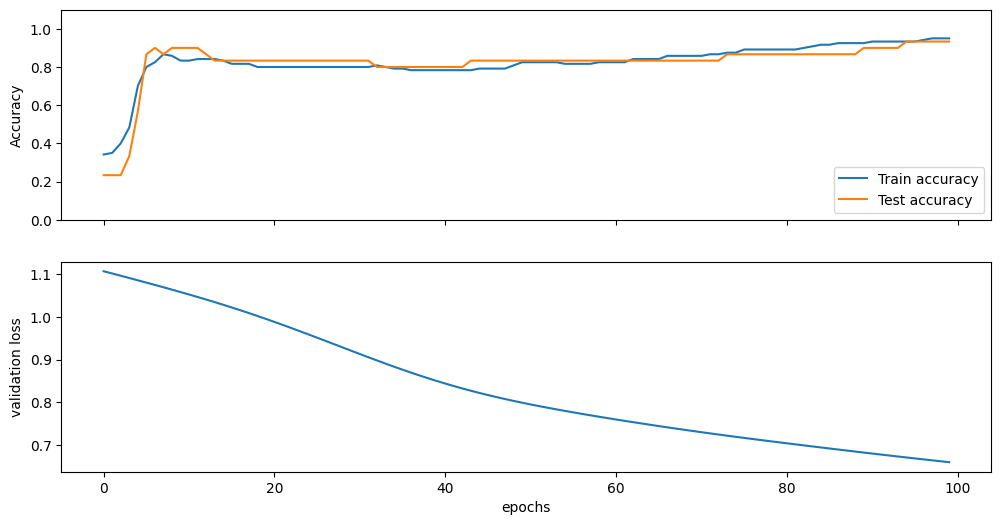

================== Number of neuron in HL = 100 ==================


100%|██████████| 100/100 [00:00<00:00, 348.43it/s]


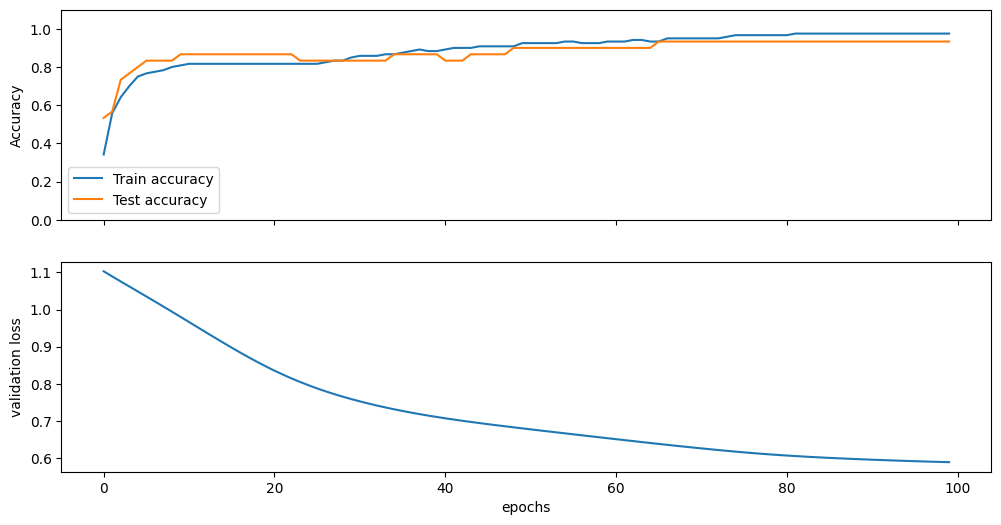

================== Number of neuron in HL = 1000 ==================


100%|██████████| 100/100 [00:03<00:00, 25.13it/s]


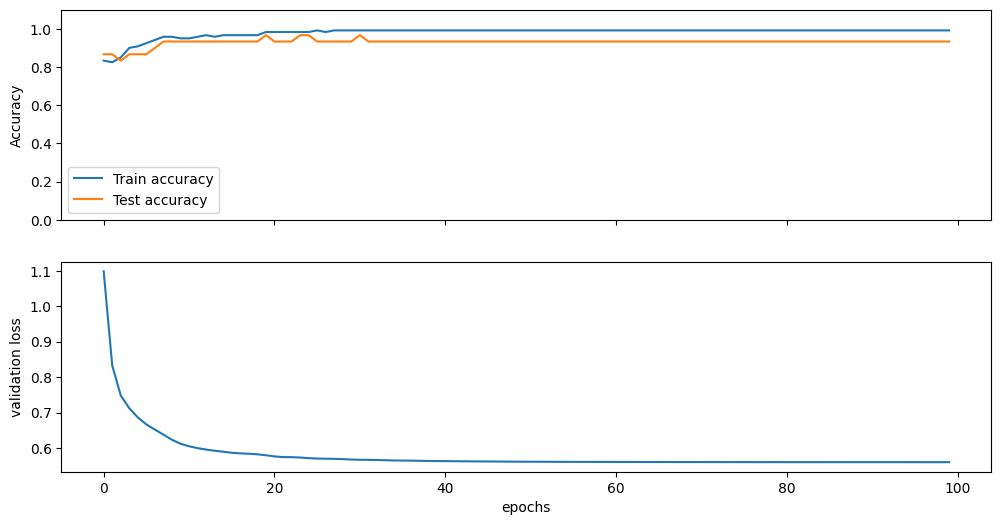

================== Number of neuron in HL = 10000 ==================


100%|██████████| 100/100 [24:09<00:00, 14.49s/it]


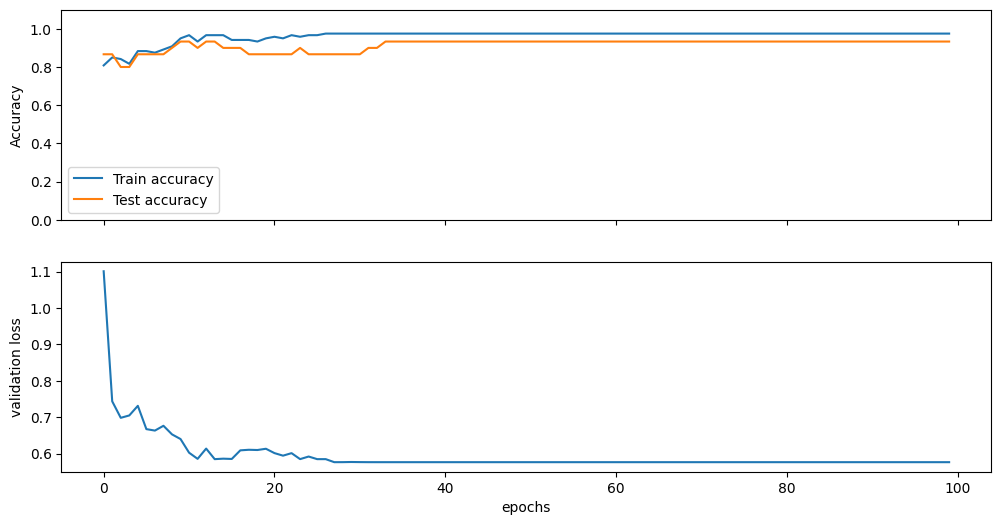

================== Number of neuron in HL = 50 ==================


100%|██████████| 100/100 [00:00<00:00, 216.61it/s]


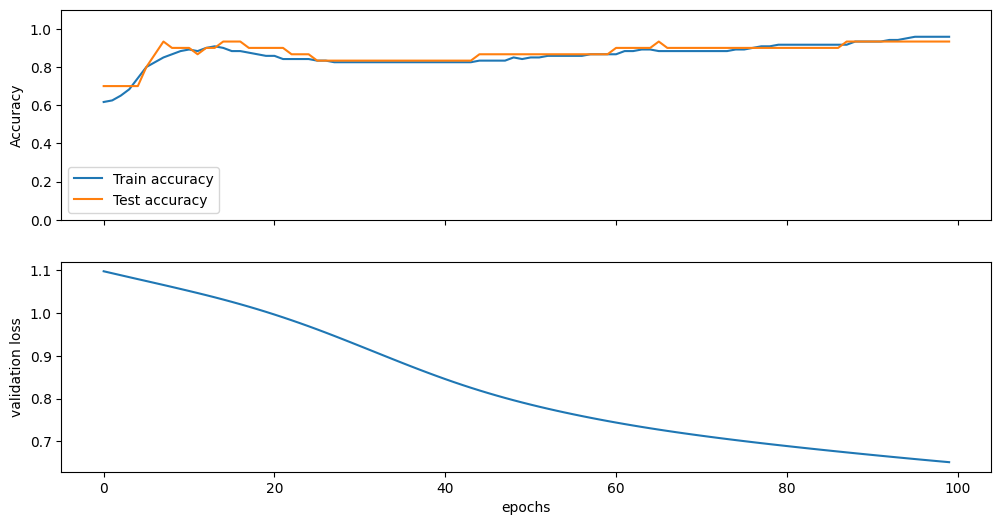

================== Number of neuron in HL = 100 ==================


100%|██████████| 100/100 [00:00<00:00, 280.29it/s]


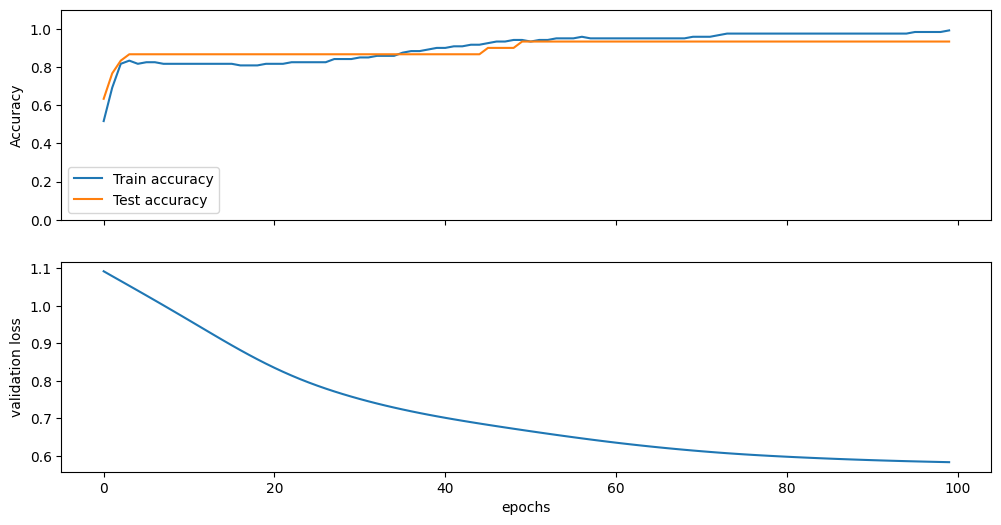

================== Number of neuron in HL = 1000 ==================


100%|██████████| 100/100 [00:03<00:00, 28.53it/s]


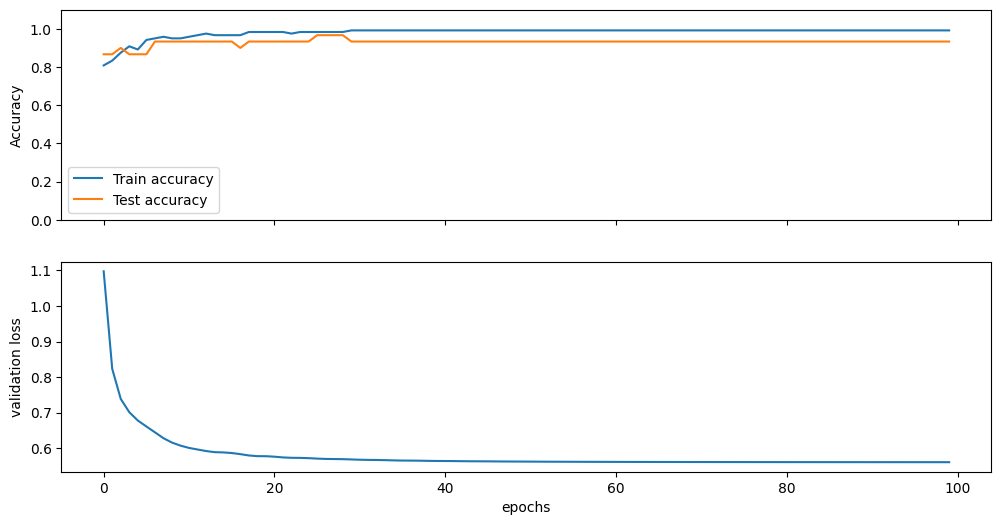

================== Number of neuron in HL = 10000 ==================


100%|██████████| 100/100 [18:20<00:00, 11.01s/it]


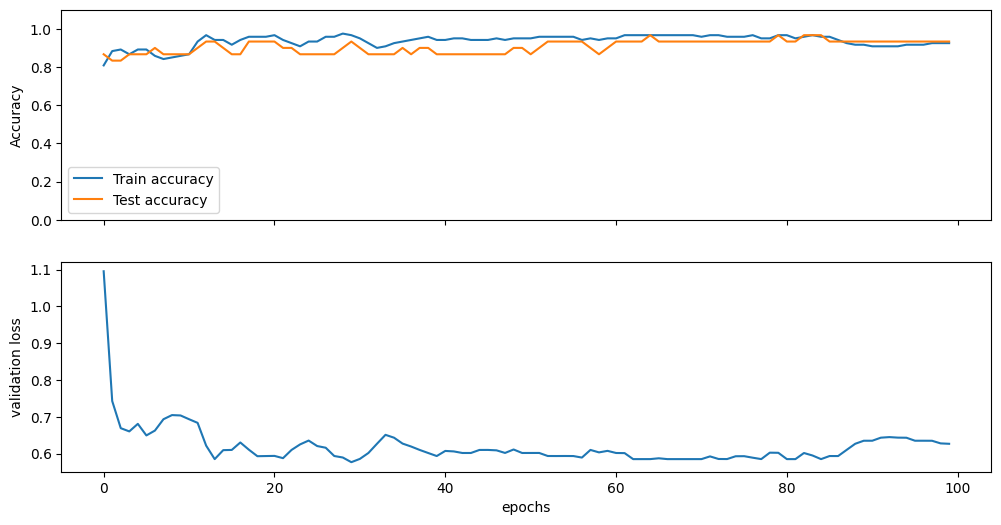

In [13]:
# Defining the model architecture
class Model_exp2(nn.Module):
    def __init__(self, input_dim, neurons):
        super(Model_exp2, self).__init__()
        self.layer1 = nn.Linear(input_dim, neurons)
        self.layer2 = nn.Linear(neurons, neurons)
        self.layer3 = nn.Linear(neurons, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
neurons = [50, 100, 1000, 10000]
for neuron_count in neurons:
  # Preparing Dataset
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)
  print(f"================== Number of neuron in HL = {neuron_count} ==================")
  model     = Model_exp2(X_train.shape[1], neuron_count)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  loss_fn   = nn.CrossEntropyLoss()

  # Train for 100 epochs
  EPOCHS  = 100
  X_train = torch.from_numpy(X_train).float()
  X_test= torch.from_numpy(X_test).float()
  y_test = torch.from_numpy(y_test)
  y_train = torch.from_numpy(y_train)


  loss_list = np.zeros((EPOCHS,))
  accuracy_list_train = np.zeros((EPOCHS,))
  accuracy_list_test = np.zeros((EPOCHS,))

  for epoch in tqdm.trange(EPOCHS):
      y_pred = model(X_train)
      loss = loss_fn(y_pred, y_train)
      loss_list[epoch] = loss.item()

      # Zero gradients
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      with torch.no_grad():
          # Test Accuracy
          y_pred = model(X_test)
          correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
          accuracy_list_test[epoch] = correct.mean()

          # Train Accuracy
          y_pred = model(X_train)
          correct = (torch.argmax(y_pred, dim=1) == y_train).type(torch.FloatTensor)
          accuracy_list_train[epoch] = correct.mean()

  fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

  ax1.plot(accuracy_list_train, label="Train accuracy")
  ax1.plot(accuracy_list_test, label="Test accuracy")
  ax1.legend()
  ax1.set_ylabel("Accuracy")
  ax1.set_ylim(0, 1.1)
  ax2.plot(loss_list)
  ax2.set_ylabel("validation loss")
  ax2.set_xlabel("epochs")
  plt.show()

# Defining the model architecture
class Model_exp2(nn.Module):
    def __init__(self, input_dim, neurons):
        super(Model_exp2, self).__init__()
        self.layer1 = nn.Linear(input_dim, neurons)
        self.layer2 = nn.Linear(neurons, neurons)
        self.layer3 = nn.Linear(neurons, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
neurons = [50, 100, 1000, 10000]
for neuron_count in neurons:
  # Preparing Dataset
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)
  print(f"================== Number of neuron in HL = {neuron_count} ==================")
  model     = Model_exp2(X_train.shape[1], neuron_count)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  loss_fn   = nn.CrossEntropyLoss()

  # Train for 100 epochs
  EPOCHS  = 100
  X_train = torch.from_numpy(X_train).float()
  X_test= torch.from_numpy(X_test).float()
  y_test = torch.from_numpy(y_test)
  y_train = torch.from_numpy(y_train)


  loss_list = np.zeros((EPOCHS,))
  accuracy_list_train = np.zeros((EPOCHS,))
  accuracy_list_test = np.zeros((EPOCHS,))

  for epoch in tqdm.trange(EPOCHS):
      y_pred = model(X_train)
      loss = loss_fn(y_pred, y_train)
      loss_list[epoch] = loss.item()

      # Zero gradients
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      with torch.no_grad():
          # Test Accuracy
          y_pred = model(X_test)
          correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
          accuracy_list_test[epoch] = correct.mean()

          # Train Accuracy
          y_pred = model(X_train)
          correct = (torch.argmax(y_pred, dim=1) == y_train).type(torch.FloatTensor)
          accuracy_list_train[epoch] = correct.mean()

  fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

  ax1.plot(accuracy_list_train, label="Train accuracy")
  ax1.plot(accuracy_list_test, label="Test accuracy")
  ax1.legend()
  ax1.set_ylabel("Accuracy")
  ax1.set_ylim(0, 1.1)
  ax2.plot(loss_list)
  ax2.set_ylabel("validation loss")
  ax2.set_xlabel("epochs")
  plt.show()


As we increased more more number of neuron the model started to behave similar we increased more HL, faster convergence, higher accuracy, longer training time and tendency to over fit

================== Activation Functions is <function relu at 0x78124713e680> ==================


100%|██████████| 100/100 [00:00<00:00, 355.71it/s]


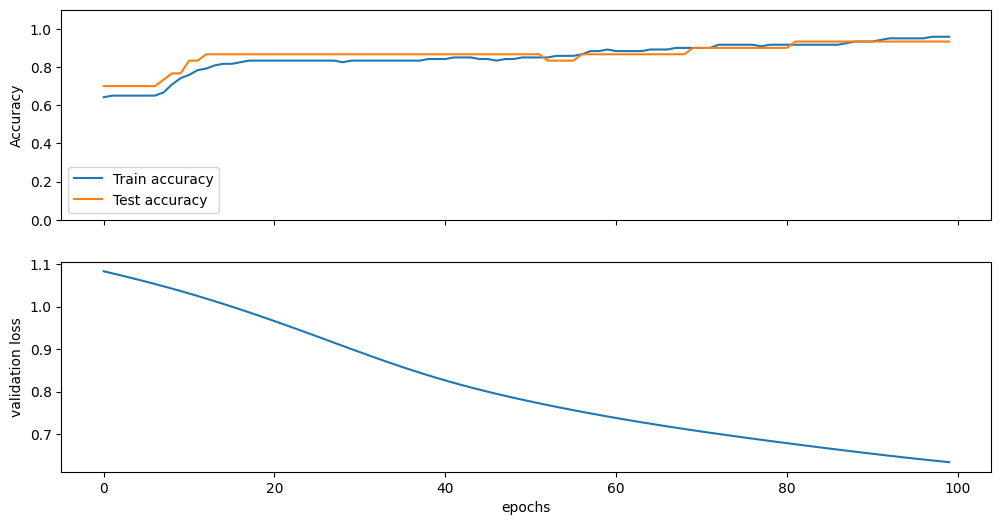

================== Activation Functions is <function tanh at 0x78124713f0a0> ==================


100%|██████████| 100/100 [00:00<00:00, 395.47it/s]


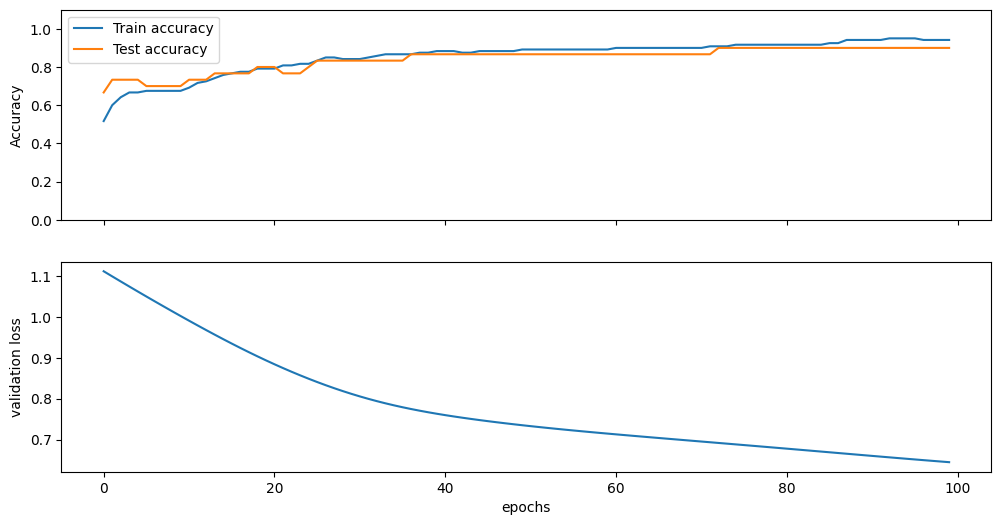

================== Activation Functions is <function sigmoid at 0x78124713f130> ==================


100%|██████████| 100/100 [00:00<00:00, 469.64it/s]


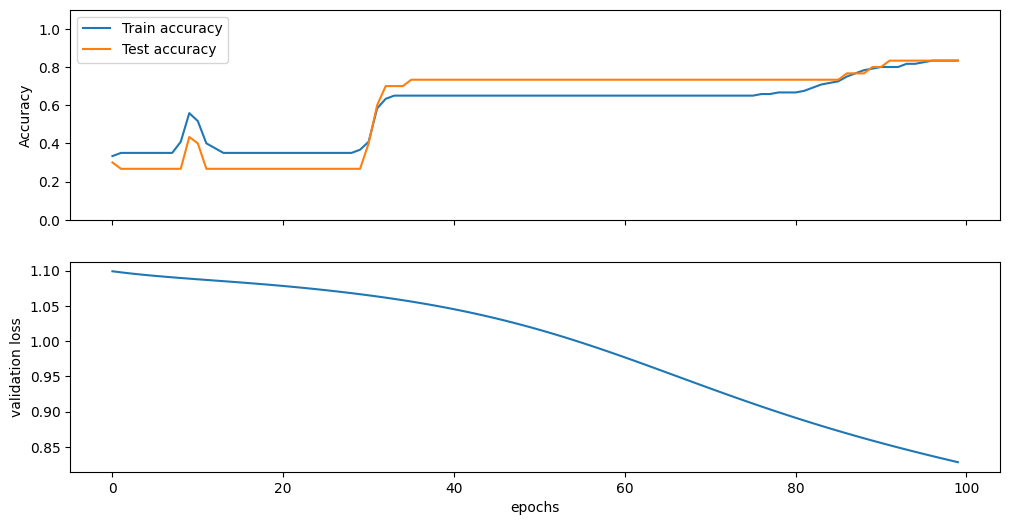

In [14]:
# Defining the model architecture
class Model_exp3(nn.Module):
    def __init__(self, input_dim, act_function):
        super(Model_exp3, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        self.activation = act_function

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
act_functions = [F.relu, F.tanh, F.sigmoid]
for act in act_functions:
  # Preparing Dataset
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)
  print(f"================== Activation Functions is {act} ==================")
  model     = Model_exp3(X_train.shape[1], act)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  loss_fn   = nn.CrossEntropyLoss()

  # Train for 100 epochs
  EPOCHS  = 100
  X_train = torch.from_numpy(X_train).float()
  X_test= torch.from_numpy(X_test).float()
  y_test = torch.from_numpy(y_test)
  y_train = torch.from_numpy(y_train)


  loss_list = np.zeros((EPOCHS,))
  accuracy_list_train = np.zeros((EPOCHS,))
  accuracy_list_test = np.zeros((EPOCHS,))

  for epoch in tqdm.trange(EPOCHS):
      y_pred = model(X_train)
      loss = loss_fn(y_pred, y_train)
      loss_list[epoch] = loss.item()

      # Zero gradients
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      with torch.no_grad():
          # Test Accuracy
          y_pred = model(X_test)
          correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
          accuracy_list_test[epoch] = correct.mean()

          # Train Accuracy
          y_pred = model(X_train)
          correct = (torch.argmax(y_pred, dim=1) == y_train).type(torch.FloatTensor)
          accuracy_list_train[epoch] = correct.mean()

  fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

  ax1.plot(accuracy_list_train, label="Train accuracy")
  ax1.plot(accuracy_list_test, label="Test accuracy")
  ax1.legend()
  ax1.set_ylabel("Accuracy")
  ax1.set_ylim(0, 1.1)
  ax2.plot(loss_list)
  ax2.set_ylabel("validation loss")
  ax2.set_xlabel("epochs")
  plt.show()




Above plot shows the variation loss/accuracy with change in activation functions, namely relu, tanh, sigmoid. In this particular case, relu seems to be a better option since it has the least fluctuations in accuracy and faster convergence.